In [1]:
pip install pandas yfinance matplotlib fredapi


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/d5/2a/63be4c36ca88e222ce34c010819e4c455f16d7775c4d5df4e958f8312170/yfinance-0.2.62-py2.py3-none-any.whl.metadata
  Obtaining dependency information for fredapi from https://files.pythonhosted.org/packages/73/64/1db43417cf7ed430f104a347126b5260a1724ee9a1b7d0b1622262c9c4df/fredapi-0.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

/tmp/ipykernel_331/684294411.py:51: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download("^GSPC", start="2018-01-01")
[*********************100%***********************]  1 of 1 completed


4769.830078125


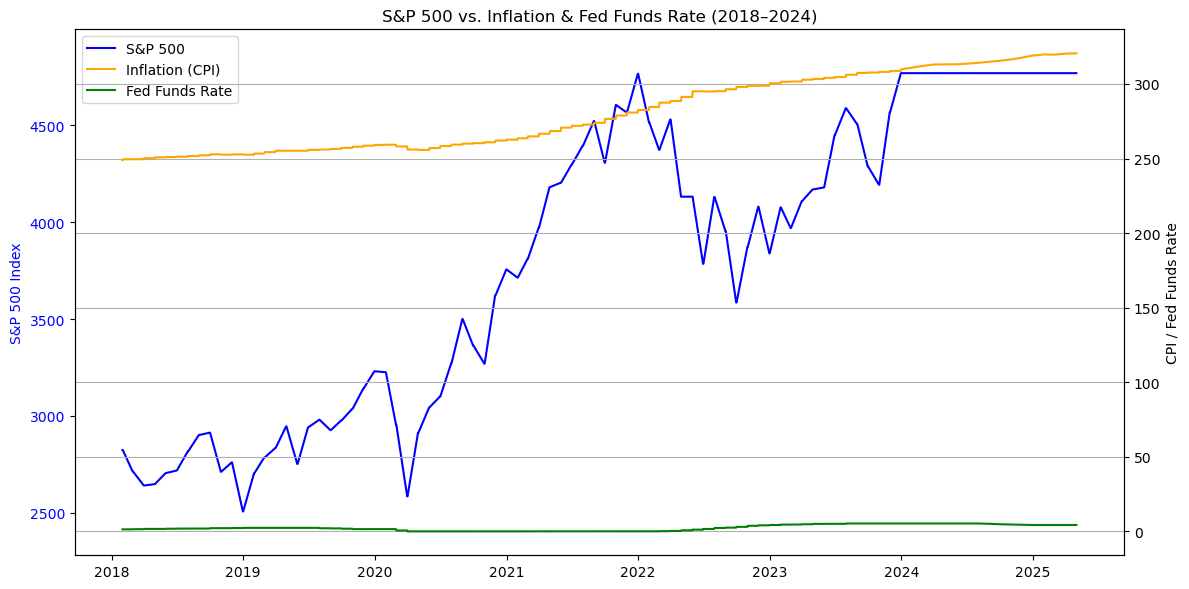

                S&P 500  Inflation (CPI)  Fed Funds Rate
2018-01-31  2823.810059          248.859            1.41
2018-02-01  2823.810059          249.529            1.42
2018-02-28  2713.830078          249.529            1.42
2018-03-01  2713.830078          249.577            1.51
2018-03-31  2640.870117          249.577            1.51
2018-04-01  2640.870117          250.227            1.69
2018-04-30  2648.050049          250.227            1.69
2018-05-01  2648.050049          250.792            1.70
2018-05-31  2705.270020          250.792            1.70
2018-06-01  2705.270020          251.018            1.82


In [13]:
# import yfinance as yf
# import pandas as pd
# import matplotlib.pyplot as plt
# from fredapi import Fred

# #FRED API key
# fred = Fred(api_key='9635874541eb68b8abbb3a2093d0e5a6')

# # Download S&P 500 data (daily, then resample monthly)
# sp500_data = yf.download("^GSPC", start="2018-01-01", end="2024-01-01")
# sp500_monthly = sp500_data['Close'].resample('M').last().squeeze()

# # Download CPI and Fed Funds Rate from FRED
# cpi = fred.get_series('CPIAUCSL')  # Consumer Price Index
# fed_rate = fred.get_series('FEDFUNDS')  # Interest rate

# # Convert CPI and Fed Rate to DataFrames and forward fill to align
# cpi = pd.Series(cpi).resample('M').ffill()
# fed_rate = pd.Series(fed_rate).resample('M').ffill()

# # Combine into one DataFrame and forward fill missing values
# df = pd.concat([
#     sp500_monthly.rename("S&P 500"),
#     cpi.rename("Inflation (CPI)"),
#     fed_rate.rename("Fed Funds Rate")
# ], axis=1).ffill().dropna()

# # Print a preview to debug
# print(df.head(10))

# # Plot all three
# df.plot(title="S&P 500 vs. Inflation & Fed Rate", figsize=(12,6))
# plt.ylabel("Index / Rate")
# plt.grid(True)
# plt.show()

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# 💡 Clear any overwritten built-ins
for name in ['str', 'list', 'labels']:
    if name in globals():
        del globals()[name]

# 🔐 FRED API key
fred = Fred(api_key='9635874541eb68b8abbb3a2093d0e5a6')

# 1. Get S&P 500 monthly data
sp500_data = yf.download("^GSPC", start="2018-01-01")
# sp500 = sp500_data['Close'].resample('M').last().squeeze()
sp500 = sp500_data['Close'].resample('M').last()

# 2. Get CPI & Fed Funds Rate from FRED
cpi = fred.get_series('CPIAUCSL')
fed_rate = fred.get_series('FEDFUNDS')

# Combine into one DataFrame and forward fill missing values
df = pd.concat([
    sp500_monthly.rename("S&P 500"),
    cpi.rename("Inflation (CPI)"),
    fed_rate.rename("Fed Funds Rate")
], axis=1).ffill().dropna()

# 4. Plot using twin axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot S&P 500 on primary axis
ax1.plot(df.index, df["S&P 500"], color='blue', label='S&P 500')
ax1.set_title("S&P 500 vs. Inflation & Fed Funds Rate (2018–2024)")
ax1.set_ylabel("S&P 500 Index", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Expand y-axis for S&P 500
min_sp, max_sp = df["S&P 500"].min(), df["S&P 500"].max()
print(max_sp)
padding = (max_sp - min_sp) * 0.10  # 10% padding
ax1.set_ylim(min_sp - padding, max_sp + padding)

# Twin axis for CPI & Fed Rate
ax2 = ax1.twinx()
ax2.plot(df.index, df["Inflation (CPI)"], color='orange', label='Inflation (CPI)')
ax2.plot(df.index, df["Fed Funds Rate"], color='green', label='Fed Funds Rate')
ax2.set_ylabel("CPI / Fed Funds Rate", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

# Print a preview to debug
print(df.head(10))


In [2]:
import yfinance as yf

data = yf.download("^GSPC", start="2018-01-01", end="2024-01-01")
print(data.head())  # See what columns exist

/tmp/ipykernel_246/2637595424.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^GSPC", start="2018-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2018-01-02  2695.810059  2695.889893  2682.360107  2683.729980  3397430000
2018-01-03  2713.060059  2714.370117  2697.770020  2697.850098  3544030000
2018-01-04  2723.989990  2729.290039  2719.070068  2719.310059  3697340000
2018-01-05  2743.149902  2743.449951  2727.919922  2731.330078  3239280000
2018-01-08  2747.709961  2748.510010  2737.600098  2742.669922  3246160000


/tmp/ipykernel_331/1053654147.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", period="5y", interval="1d")['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed


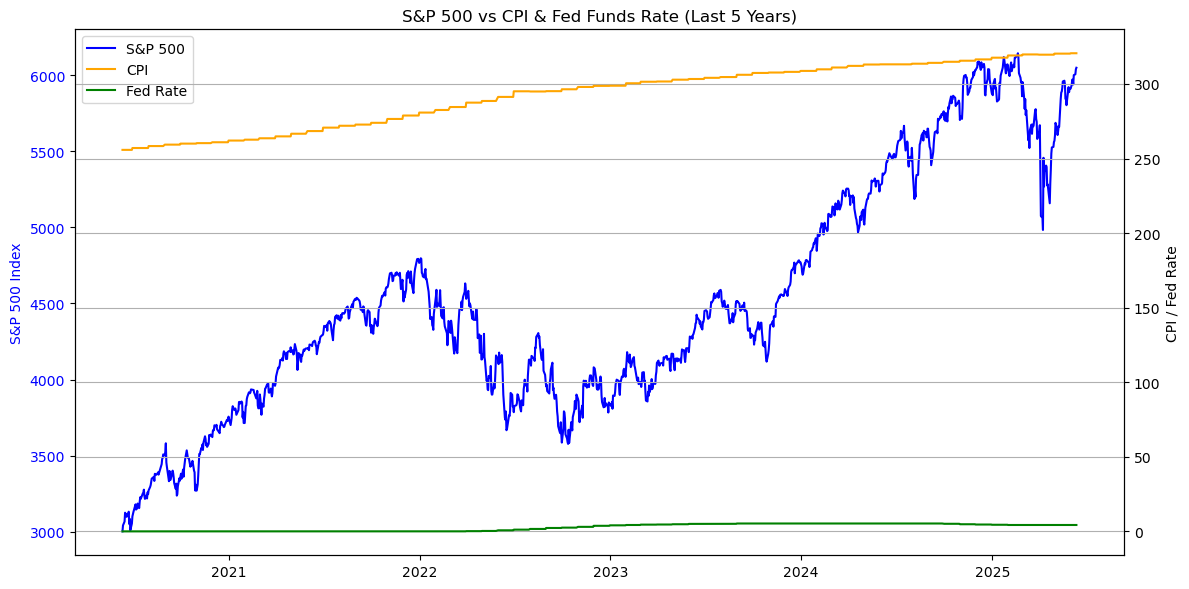

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Your FRED key
fred = Fred(api_key='9635874541eb68b8abbb3a2093d0e5a6')

# 1. Fetch S&P 500 over the last 5 years, monthly
sp500 = yf.download("^GSPC", period="5y", interval="1d")['Close'].squeeze()

# 2. Fetch CPI & Fed Funds Rate (as before)
cpi = fred.get_series('CPIAUCSL').resample('M').ffill()
fed_rate = fred.get_series('FEDFUNDS').resample('M').ffill()

# 3. Combine only matching dates
df = pd.concat([
    sp500.rename("S&P 500"),
    cpi.rename("Inflation (CPI)"),
    fed_rate.rename("Fed Funds Rate")
], axis=1).ffill().dropna()

# 4. Plot with dual axes
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(df.index, df["S&P 500"], 'b-', label='S&P 500')
ax1.set_ylabel("S&P 500 Index", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df.index, df["Inflation (CPI)"], 'orange', label='CPI')
ax2.plot(df.index, df["Fed Funds Rate"], 'g-', label='Fed Rate')
ax2.set_ylabel("CPI / Fed Rate", color='k')
ax2.tick_params(axis='y', labelcolor='k')

# Combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines+lines2, labels+labels2, loc='upper left')

plt.title("S&P 500 vs CPI & Fed Funds Rate (Last 5 Years)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# 1. Compute moving averages
df['MA5']  = df['S&P 500'].rolling(window=5).mean()   # 5-month
df['MA20'] = df['S&P 500'].rolling(window=20).mean()  # 20-month

# 2. Generate signals: 1 = long/buy, -1 = short/sell, 0 = no position
df['Signal'] = 0
df.loc[df['MA5'] > df['MA20'], 'Signal'] = 1
df.loc[df['MA5'] < df['MA20'], 'Signal'] = -1

# 3. Shift signals to simulate entering at next period’s open
df['Position'] = df['Signal'].shift(1)


<Axes: title={'center': 'Strategy vs Buy-and-Hold Performance'}>

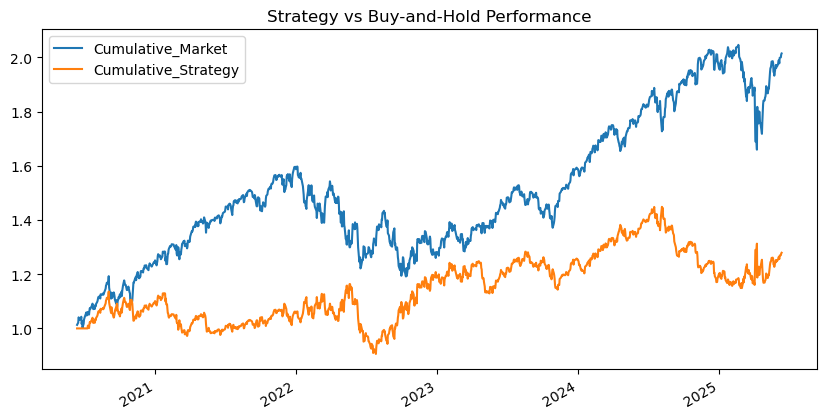

In [23]:
# Calculate monthly returns of the S&P
df['Market_Return'] = df['S&P 500'].pct_change()

# Strategy return = market return * position you held
df['Strategy_Return'] = df['Market_Return'] * df['Position']

# Cumulative performance
df['Cumulative_Market']   = (1 + df['Market_Return']).cumprod()
df['Cumulative_Strategy'] = (1 + df['Strategy_Return']).cumprod()

# Plot both
df[['Cumulative_Market', 'Cumulative_Strategy']].plot(figsize=(10, 5),
    title="Strategy vs Buy-and-Hold Performance")


/tmp/ipykernel_331/1380952696.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", period="10y", interval="1d")['Close']
[*********************100%***********************]  1 of 1 completed


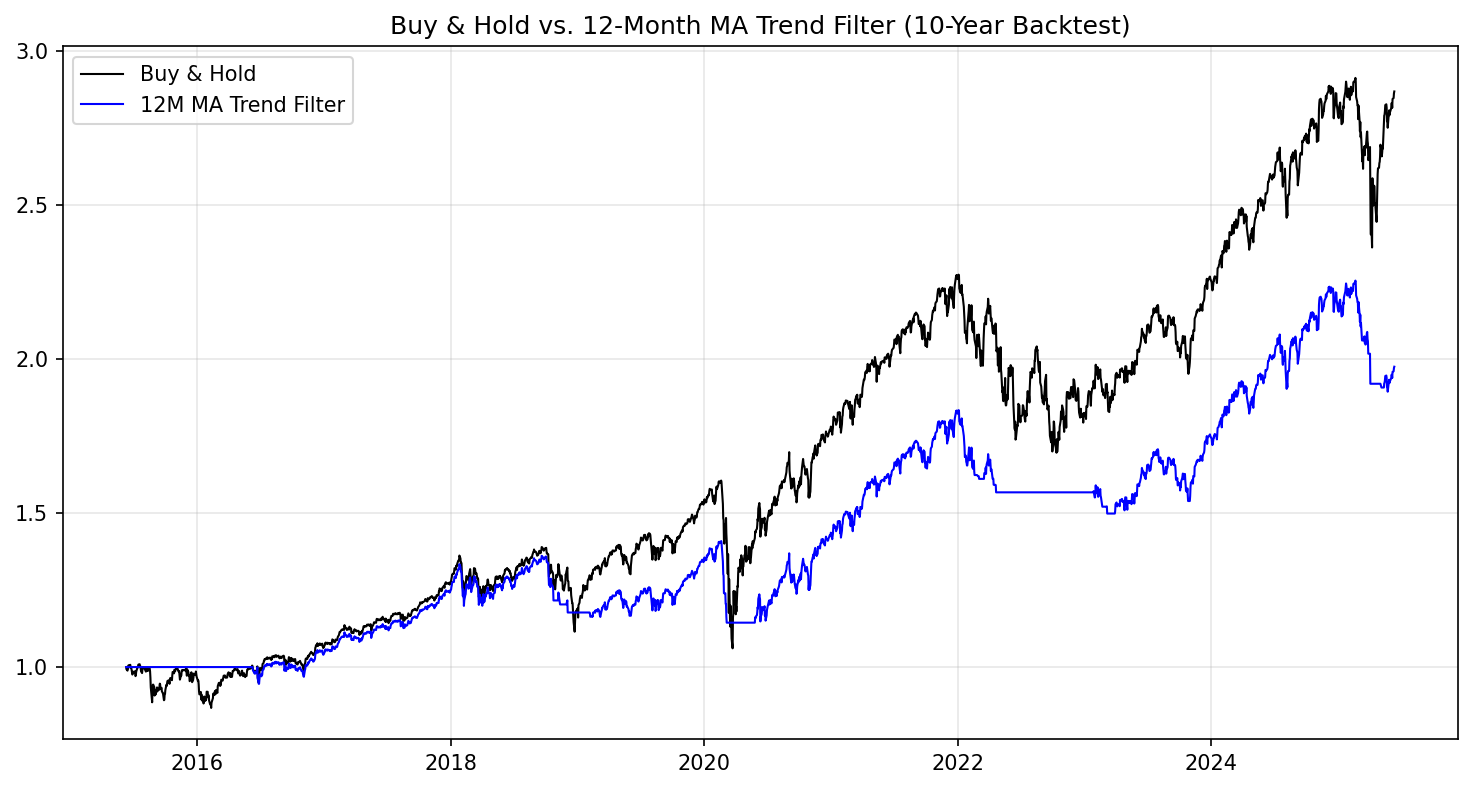

In [24]:
# 1. Fetch daily S&P 500 data (last 10 years for backtest)
sp500 = yf.download("^GSPC", period="10y", interval="1d")['Close']

# 2. Compute 12-month (252 trading days) moving average
ma12 = sp500.rolling(window=252).mean()

# 3. Generate position: 1 = invest, 0 = cash
signal = (sp500 > ma12).astype(int)

# 4. Compute daily returns
market_ret = sp500.pct_change().fillna(0)
strategy_ret = market_ret * signal.shift(1).fillna(0)

# 5. Cumulative performance
cum_market = (1 + market_ret).cumprod()
cum_strategy = (1 + strategy_ret).cumprod()

# 6. Plot results
plt.figure(figsize=(12,6), dpi=150)
plt.plot(cum_market, label='Buy & Hold', color='black', lw=1)
plt.plot(cum_strategy, label='12M MA Trend Filter', color='blue', lw=1)
plt.title('Buy & Hold vs. 12-Month MA Trend Filter (10-Year Backtest)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


/tmp/ipykernel_331/1944983934.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", period="10y", interval="1d")['Close']
[*********************100%***********************]  1 of 1 completed


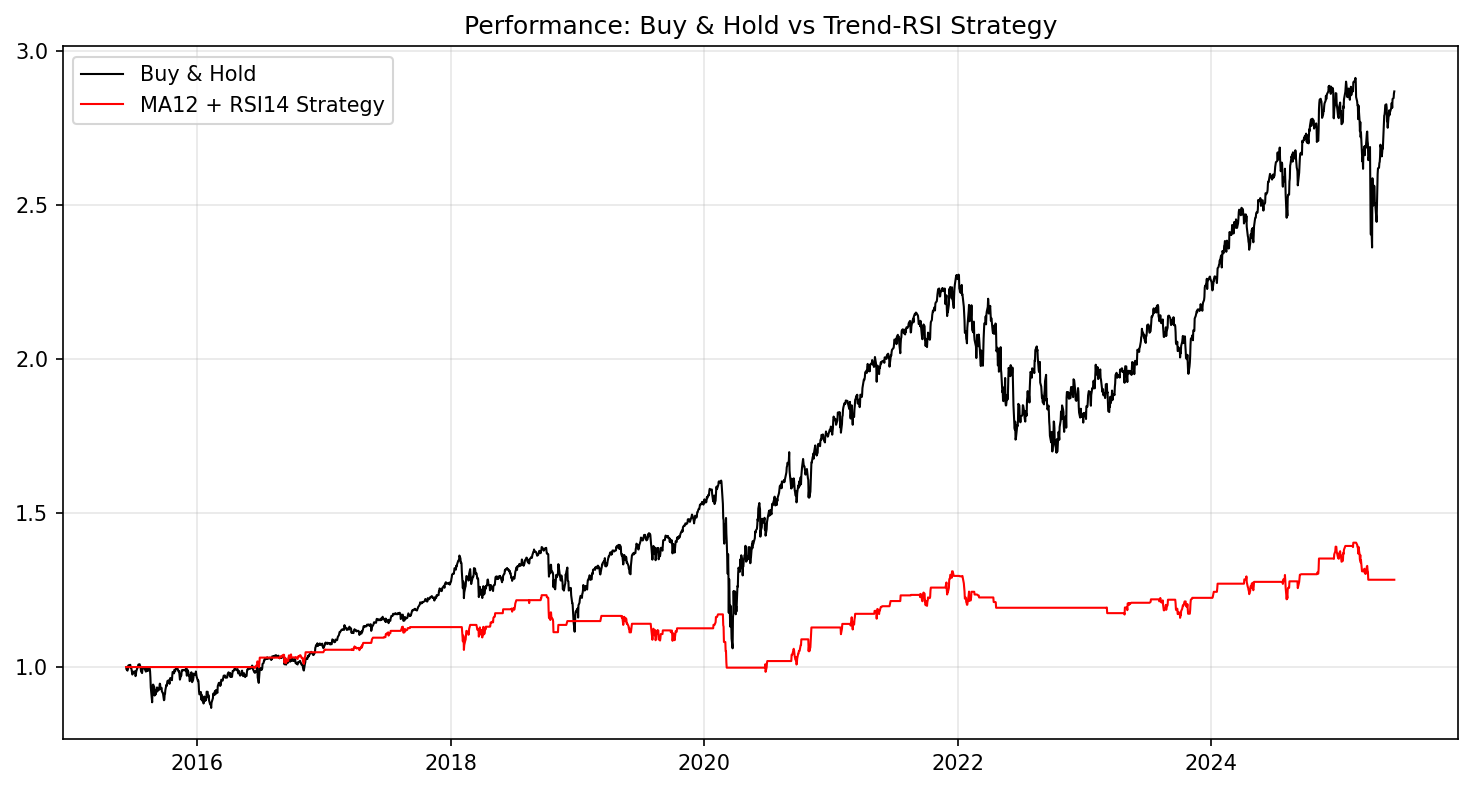

In [25]:
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0).rolling(period).mean()
    loss = -delta.clip(upper=0).rolling(period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# 1. Fetch daily S&P 500 for last 10 years
sp500 = yf.download("^GSPC", period="10y", interval="1d")['Close']

# 2. Compute indicators
ma12 = sp500.rolling(window=252).mean()
rsi14 = compute_rsi(sp500, 14)

# 3. Generate signals
signal = ((sp500 > ma12) & (rsi14 < 50)).astype(int)  # Enter long
signal[rsi14 > 70] = 0                               # Exit long
position = signal.shift(1).fillna(0)

# 4. Calculate returns
market_ret = sp500.pct_change().fillna(0)
strat_ret  = market_ret * position

# 5. Cumulative performance
cum_mkt   = (1 + market_ret).cumprod()
cum_strat = (1 + strat_ret).cumprod()

# 6. Plot comparison
plt.figure(figsize=(12, 6), dpi=150)
plt.plot(cum_mkt, label='Buy & Hold', color='black', lw=1)
plt.plot(cum_strat, label='MA12 + RSI14 Strategy', color='red', lw=1)
plt.title('Performance: Buy & Hold vs Trend-RSI Strategy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


/tmp/ipykernel_331/1313207635.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tickers = yf.download(['SPY','AGG'], start='2013-01-01', end=None, interval='1mo')['Close']
[*********************100%***********************]  2 of 2 completed


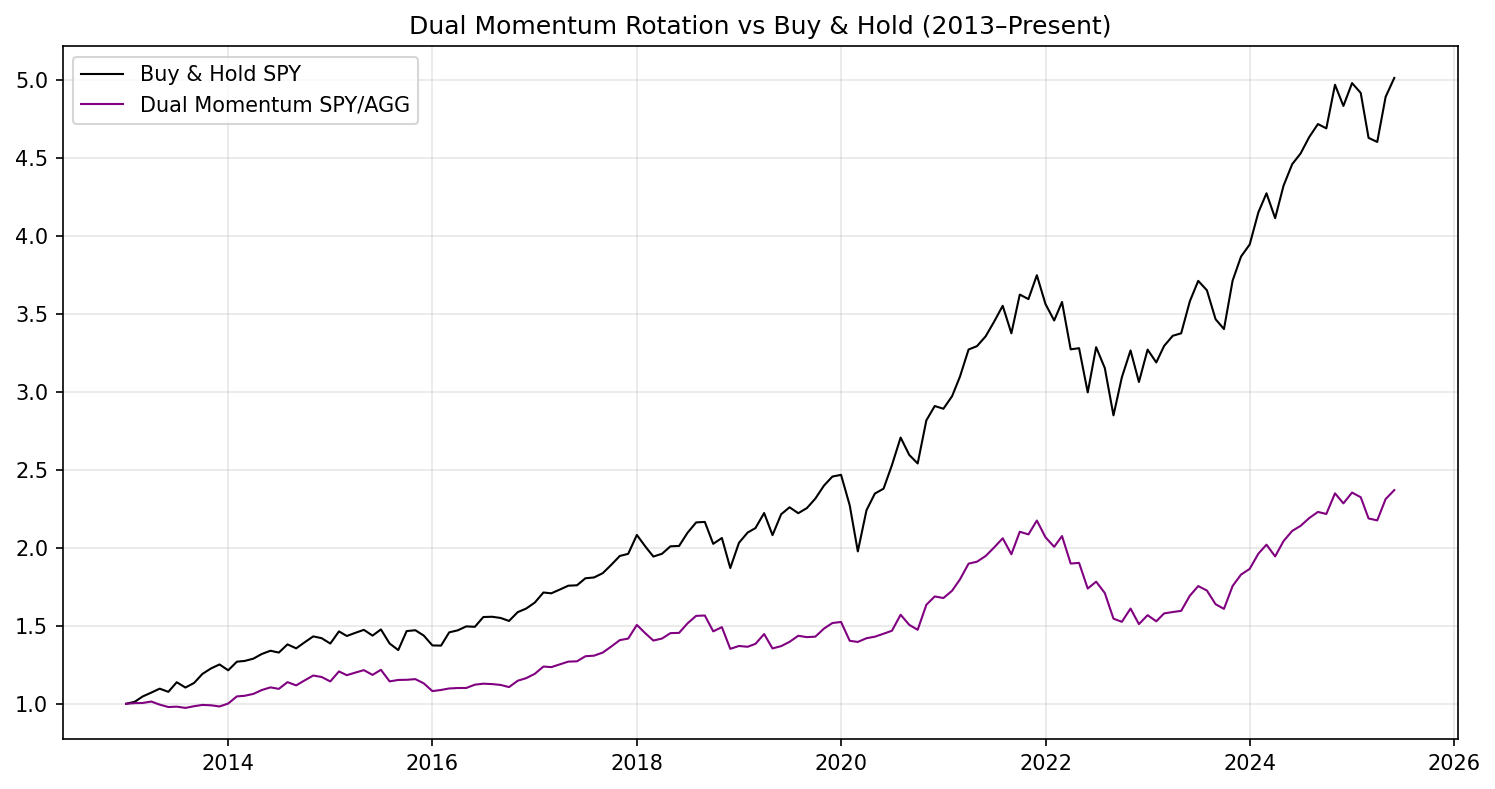

In [27]:
# 1. Download monthly data for SPY (S&P 500 ETF) and AGG (Aggregate Bond ETF)
tickers = yf.download(['SPY','AGG'], start='2013-01-01', end=None, interval='1mo')['Close']

# 2. Compute 12-month momentum
mom = tickers.pct_change(12)

# 3. Generate monthly position: 1 = SPY, 0 = AGG
position = (mom['SPY'] > mom['AGG']).shift(1).fillna(0)

# 4. Calculate monthly returns for each ETF
rets = tickers.pct_change().fillna(0)

# 5. Strategy return: weighted by position
strat_ret = rets['SPY'] * position + rets['AGG'] * (1 - position)

# 6. Cumulative performance
cum_mkt = (1 + rets['SPY']).cumprod()
cum_strat = (1 + strat_ret).cumprod()

# 7. Plot results
plt.figure(figsize=(12,6), dpi=150)
plt.plot(cum_mkt, label='Buy & Hold SPY', color='black', lw=1)
plt.plot(cum_strat, label='Dual Momentum SPY/AGG', color='purple', lw=1)
plt.title('Dual Momentum Rotation vs Buy & Hold (2013–Present)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

/tmp/ipykernel_331/1029844152.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download("^GSPC", period="10y", interval="1d")['Close']
[*********************100%***********************]  1 of 1 completed


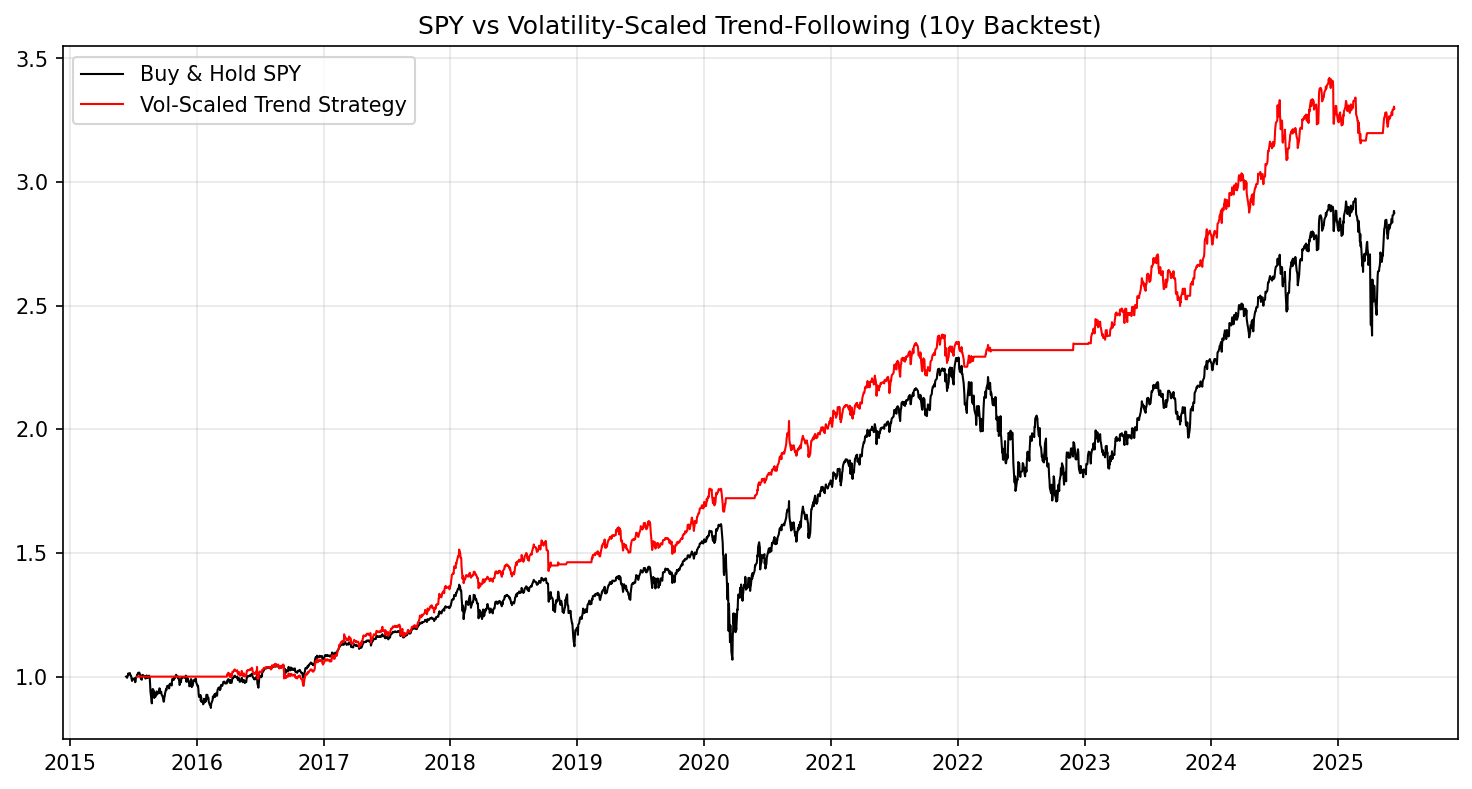

In [37]:
import numpy as np

# 1. Download daily S&P 500 data
spy = yf.download("^GSPC", period="10y", interval="1d")['Close']

# 2. Compute 200-day moving average (trend filter)
ma200 = spy.rolling(200).mean()

# 3. Compute daily returns
rets = spy.pct_change().fillna(0)

# 4. Compute rolling volatility (20 trading days annualised)
vol20 = rets.rolling(window=20).std() * np.sqrt(252)

# 5. Define target annualised vol and position size
target_vol = 0.10  # 10% annualised
raw_weight = target_vol / vol20
# Cap weights to avoid extreme leverage
weight = raw_weight.clip(0, 2)  

# 6. Apply trend filter: only hold when above MA200
signal = (spy > ma200).astype(float)
position = signal * weight.shift(1)  # shift to avoid lookahead

# 7. Strategy returns
strat_ret = position * rets

# 8. Cumulative performance
cum_mkt   = (1 + rets).cumprod()
cum_strat = (1 + strat_ret).cumprod()

# 9. Plot comparison
plt.figure(figsize=(12,6), dpi=150)
plt.plot(cum_mkt,   label='Buy & Hold SPY', color='black', lw=1)
plt.plot(cum_strat, label='Vol-Scaled Trend Strategy', color='red',   lw=1)
plt.title('SPY vs Volatility-Scaled Trend-Following (10y Backtest)')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("chart.png", dpi=300, bbox_inches='tight')
plt.show()
